<a href="https://colab.research.google.com/github/taehyeonk/pre-onboarding_project/blob/seondo/5%ED%8C%80_%EA%B8%B0%EC%97%85_%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

     |████████████████████████████████| 312 kB 8.0 MB/s 
     |████████████████████████████████| 212 kB 49.0 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 134 kB 61.7 MB/s 
     |████████████████████████████████| 127 kB 54.0 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 62.1 MB/s 
     |████████████████████████████████| 271 kB 63.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import torch
import pandas as pd
import numpy as np
from datasets import load_dataset

In [4]:
dataset = load_dataset("klue", "sts")

Downloading:   0%|          | 0.00/5.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.93k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset klue downloaded and prepared to /root/.cache/huggingface/datasets/klue/sts/1.0.0/e0fc3bc3de3eb03be2c92d72fd04a60ecc71903f821619cb28ca0e1e29e4233e. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [61]:
# dataset train / validation 분리
train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])

In [62]:
train_df.head(3)

,guid,source,sentence1,sentence2,labels
0,klue-sts-v1_train_00000,airbnb-rtt,숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.,숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.,"{'label': 3.7, 'real-label': 3.714285714285714..."
1,klue-sts-v1_train_00001,policy-sampled,위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.,시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.,"{'label': 0.0, 'real-label': 0.0, 'binary-labe..."
2,klue-sts-v1_train_00002,paraKQC-sampled,회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.,사람들이 주로 네이버 메일을 쓰는 이유를 알려줘,"{'label': 0.3, 'real-label': 0.333333333333333..."


In [63]:
# labels 데이터 label 데이터로 변경(binary-label이나 real-label 미사용)
train_df['labels'] = train_df['labels'].apply(lambda x : x['label'])
validation_df['labels'] = validation_df['labels'].apply(lambda x : x['label'])

In [79]:
# 결측치 여부 확인
print(f'Train 데이터 수 : {len(train_df)}개, \n결측치 :\n{train_df.isnull().sum()}', '\n')
print(f'Validation 데이터 수 : {len(validation_df)}개, \n결측치 :\n{validation_df.isnull().sum()}')

Train 데이터 수 : 11668개, 
결측치 :
guid         0
source       0
sentence1    0
sentence2    0
labels       0
dtype: int64 

Validation 데이터 수 : 519개, 
결측치 :
guid         0
source       0
sentence1    0
sentence2    0
labels       0
dtype: int64


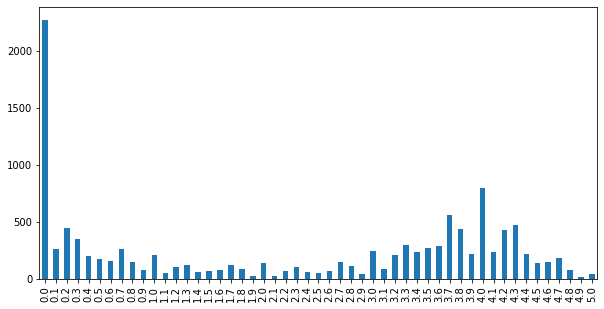

In [88]:
# Train Data label 분포
train_df['labels'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))

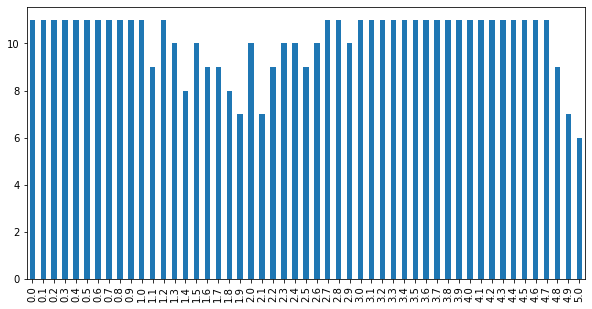

In [89]:
# Validation Data label 분포
validation_df['labels'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))